# Data Preparation with Dummy Variables

## Dummy Variables

It is used to transform categorical data to numerical data to be able to use it in a regression

### Step 1: Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Step 2: Load the Data

In [4]:
raw_data = pd.read_csv('dummy.csv')
raw_data

# As observed, the Attendance feature is in string so we have to transform 
# it to numerical to be able to add it in the regression

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


### Step 3: Map the data (Dummy Transformation)

In [5]:
data = raw_data.copy()
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})
data

# As observed, the attendance feature is now 1 and 0

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


### Step 4: Build the Regression

In [6]:
# Define dependent and independent variable
y = data['GPA']
x1 = data[['SAT', 'Attendance']]

# Create regression fitting
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 27 May 2021   Prob (F-statistic):           2.19e-15
Time:                        14:48:45   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Plot the data with the Regression

Text(0, 0.5, 'GPA')

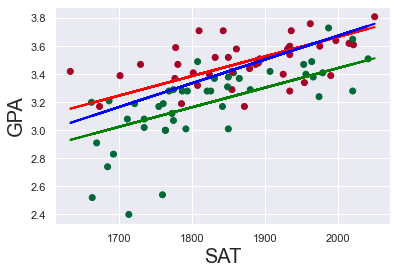

In [13]:
# We have the regression formula
# y = 0.6439 + 0.0014*SAT + 0.2226*Attendance
# 
# Since attendance can only be 1 and 0, we can transform the line to
# yhat_no = 0.6439 + 0.0014*data['SAT']  
# yhat_yes = 0.8665 + 0.0014*data['SAT']

#plt.scatter(data['SAT'],y)
plt.scatter(data['SAT'],data['GPA'], c=data['Attendance'],cmap='RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']  
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'], yhat_no, lw=2, c="green")
fig = plt.plot(data['SAT'], yhat_yes, lw=2, c="red")
fig = plt.plot(data['SAT'], yhat, lw=2, c="blue") 
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)

### Step 6: Testing the Regression

In [9]:
# Create a sample test data
new_data = pd.DataFrame({'const': 1, 'SAT':[1700, 1670], 'Attendance':[0,1]}) # Const is added as same as x = sm.add_constant(x1) 
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [10]:
# Predict
prediction = results.predict(new_data)
prediction

0    3.023513
1    3.204163
dtype: float64

In [11]:
predictionsdf = pd.DataFrame({'Predictions': prediction})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
